# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [47]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
# Set up the Splinter browser
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [49]:
# Visit the Mars Temperature Data site
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [50]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [51]:
# Extract all rows of data
rows = soup.find_all('tr', class_="data-row")
if not rows:
    print("No rows found. Please check the class used in find_all.")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [52]:
# Create an empty list
list_of_rows = []

# Loop through the scraped data to create a list of rows
for row in rows:
    td = row.find_all('td')
    row = [col.text for col in td]
    list_of_rows.append(row)

In [53]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(list_of_rows, columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])

In [54]:
# Confirm DataFrame was created successfully
print("First few rows of the DataFrame:")
df.head()

First few rows of the DataFrame:


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [55]:
# Examine data type of each column
print("\nData types before conversion:")
df.dtypes


Data types before conversion:


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [56]:
# Change data types for data analysis
df.terrestrial_date = pd.to_datetime(df.terrestrial_date)
df.sol = df.sol.astype('int')
df.ls = df.ls.astype('int')
df.month = df.month.astype('int')
df.min_temp = df.min_temp.astype('float')
df.pressure = df.pressure.astype('float')

In [57]:
# Confirm type changes were successful by examining data types again
print("\nData types after conversion:")
df.dtypes


Data types after conversion:


id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [58]:
# 1. How many months are there on Mars?
mars_months = df["month"].nunique()
print(f"\nNumber of months on Mars: {mars_months}")


Number of months on Mars: 12


In [59]:
# 2. How many sols (Martian days) worth of data are there?
martian_days = df["sol"].nunique()
print(f"\nNumber of Martian days in the dataset: {martian_days}")


Number of Martian days in the dataset: 1867


In [60]:
# 3. What is the average minimum temperature by month?
min_temp_by_month = df.groupby('month')['min_temp'].mean()
print("\nAverage minimum temperature by month:")
print(min_temp_by_month)


Average minimum temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


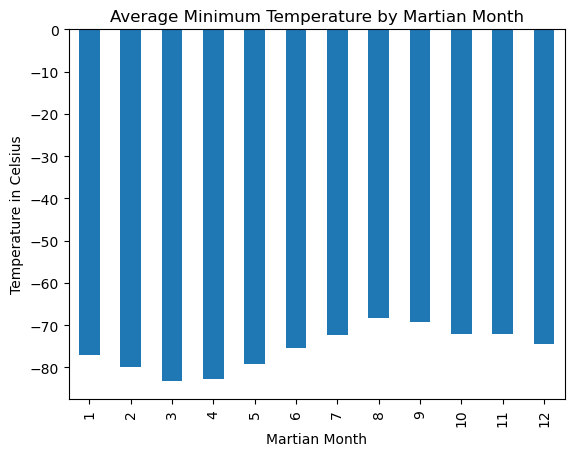

In [61]:
# Plot the average minimum temperature by month
min_temp_by_month.plot(kind='bar')
plt.title("Average Minimum Temperature by Martian Month")
plt.xlabel("Martian Month")
plt.ylabel('Temperature in Celsius')
plt.show()

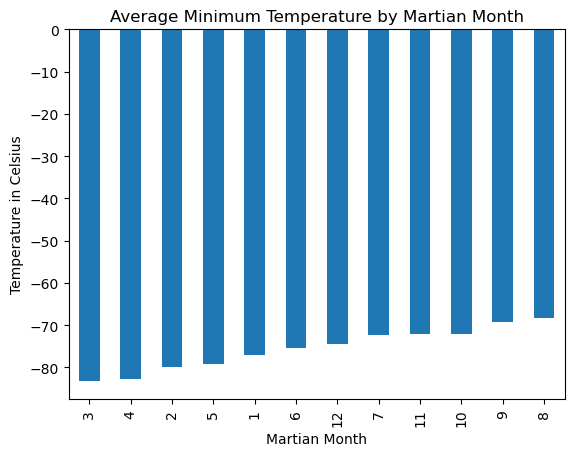

In [62]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
min_temp_by_month.sort_values().plot(kind='bar')
plt.title("Average Minimum Temperature by Martian Month")
plt.xlabel("Martian Month")
plt.ylabel('Temperature in Celsius')
plt.show()

In [63]:
# 4. What is the average pressure by month?
pressure_by_month = df.groupby('month')['pressure'].mean()
print("\nAverage atmospheric pressure by month:")
print(pressure_by_month)


Average atmospheric pressure by month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


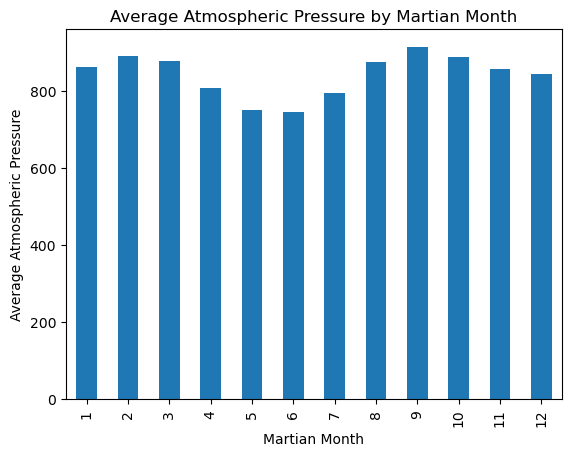

In [64]:
# Plot the average pressure by month
pressure_by_month.plot(kind='bar')
plt.xlabel("Martian Month")
plt.ylabel("Average Atmospheric Pressure")
plt.title("Average Atmospheric Pressure by Martian Month")
plt.show()

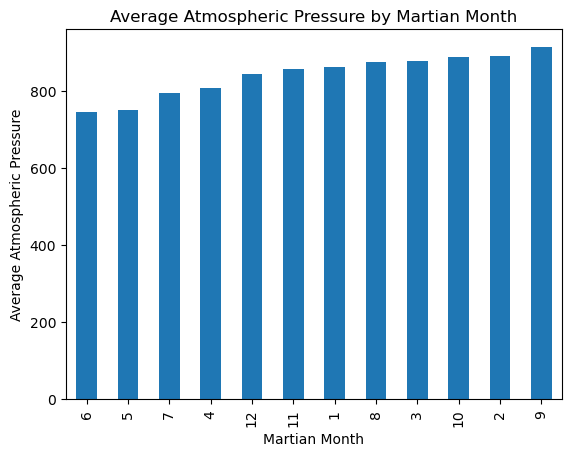

In [65]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
pressure_by_month.sort_values().plot(kind='bar')
plt.xlabel("Martian Month")
plt.ylabel("Average Atmospheric Pressure")
plt.title("Average Atmospheric Pressure by Martian Month")
plt.show()

In [66]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Sort data by terrestrial_date for analysis
df = df.sort_values("terrestrial_date")

# Group by Martian month and calculate the first date for each month
month_dates = df.groupby('month')['terrestrial_date'].min().sort_values()

# Calculate the time difference between the same month in consecutive years
month_dates_diff = month_dates.diff().dropna()

# Get the average length of a Martian year in Earth days
average_year_length = month_dates_diff.sum() / (len(month_dates_diff) / 12)
print(f"Estimated length of a Martian year in Earth days: {average_year_length.days} days")


Estimated length of a Martian year in Earth days: 670 days


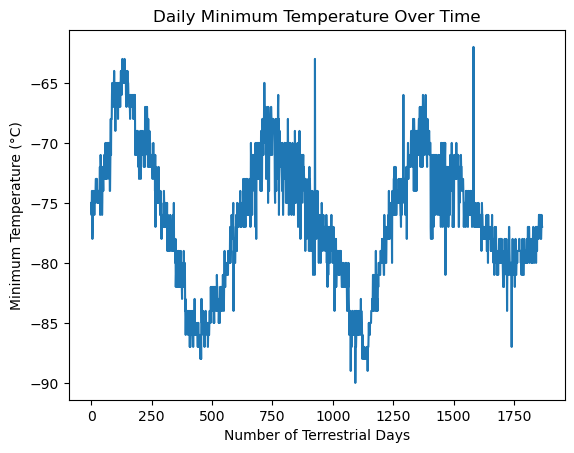

In [67]:
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
df.min_temp.plot()
plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Minimum Temperature (°C)")
plt.title("Daily Minimum Temperature Over Time")
plt.show()

#### Minimum Temperature

Based on the data provided and above analysis, on average the coldest month is the 3rd month with a teperature of -83.307292 C. This corresponds to a certain phase in the Martian year and could suggest some seasonal changes on Mars.

#### Atmospheric Pressure

Based on the data provided and above analysis, atmospheric pressure peaks during the 9th month and is lowest during the 6th month. This could be possibly due to seasonal changes in atmospheric density caused by Martian polar ice sublimation.



#### Year Length

From the temperature graph, a Martian year appears to last approximately 670 terrestrial days, aligning with the known duration of Mars's orbit.



### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [68]:
# Write the data to a CSV
output_file = "mars_weather_data.csv"
df.to_csv(output_file, index=False)
print(f"\nDataFrame exported to {output_file}")


DataFrame exported to mars_weather_data.csv


In [69]:
browser.quit()